In [153]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [154]:
N = 512
datadir = '../data_clean/'
# datadir = '../multiseed_runs/run0/Boxes/'

freion = open(datadir+'reionization/reion_00')
fdensL  = open(datadir+'density_Lag/dens_00')
fdensE  = open(datadir+'density_Eul/dens_00')

densL = np.fromfile(fdensL, count=N**3, dtype=np.float32).reshape(N,N,N)
densE = np.fromfile(fdensE, count=N**3, dtype=np.float32).reshape(N,N,N)
reion = np.fromfile(freion, count=N**3, dtype=np.float32).reshape(N,N,N)

(512, 512, 512)


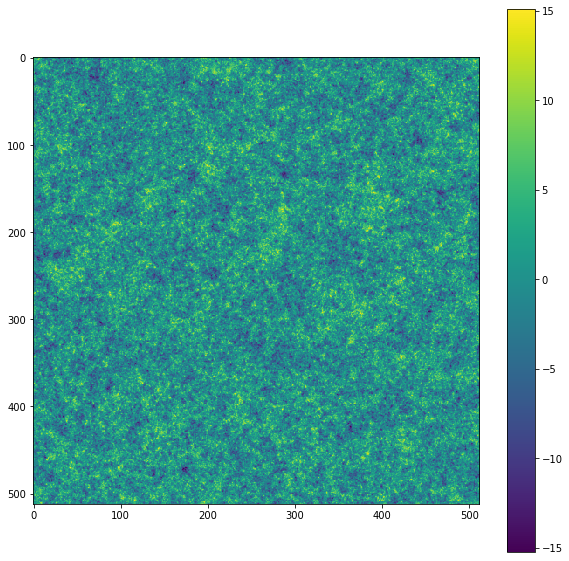

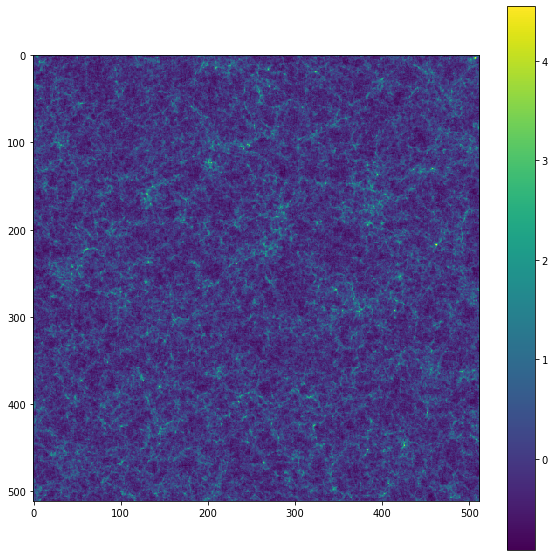

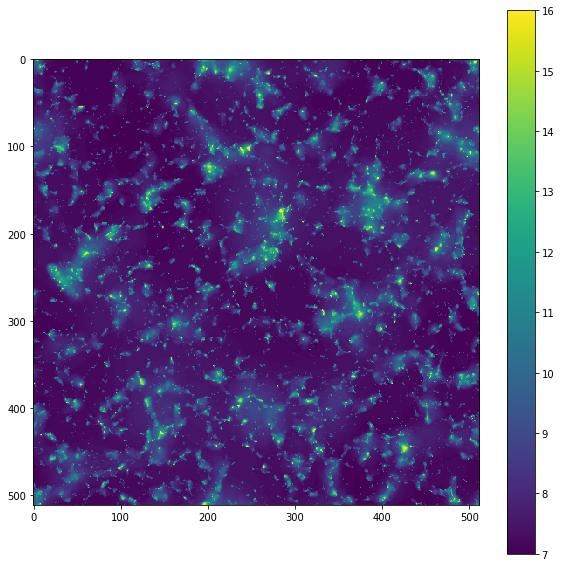

In [155]:
print(densL.shape)
plt.figure(figsize=(10,10))
plt.imshow(densL[0])
plt.colorbar()

plt.figure(figsize=(10,10))
plt.imshow(densE[0])
plt.colorbar()

plt.figure(figsize=(10,10))
plt.imshow(reion[0])
plt.colorbar()

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.

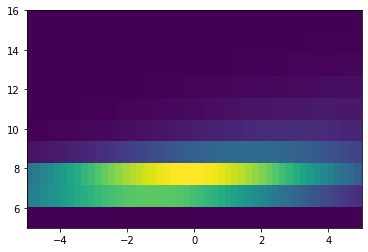

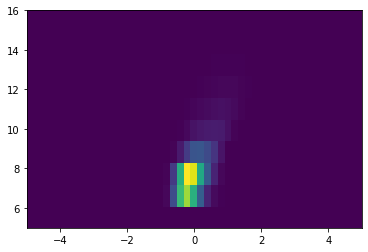

In [156]:
dbins = np.linspace(-5,5,50)
rbins = np.linspace(5,16,11)

plt.figure()
plt.hist2d(densL.flatten(), reion.flatten(), bins=(dbins,rbins))

plt.figure()
plt.hist2d(densE.flatten(), reion.flatten(), bins=(dbins,rbins))

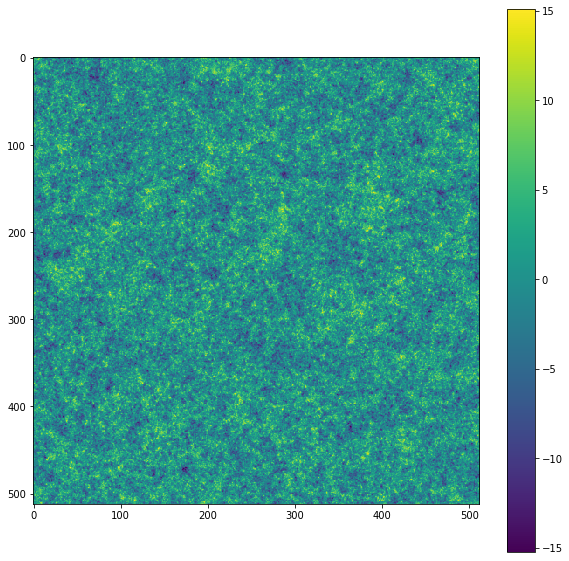

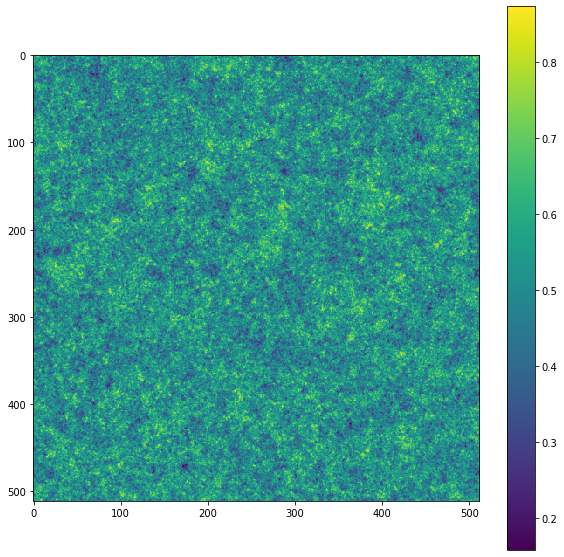

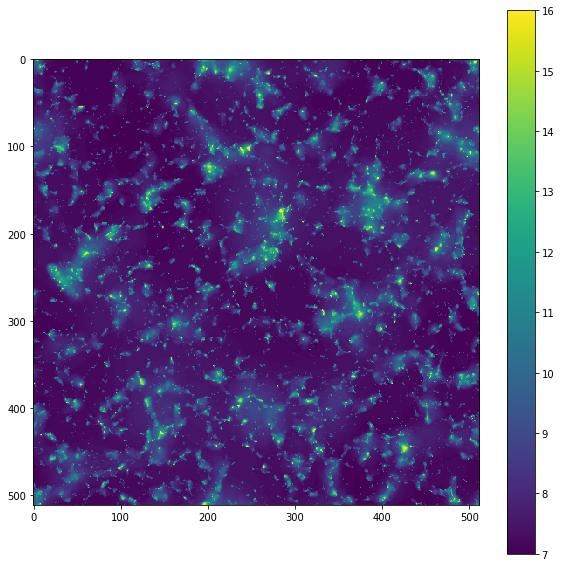

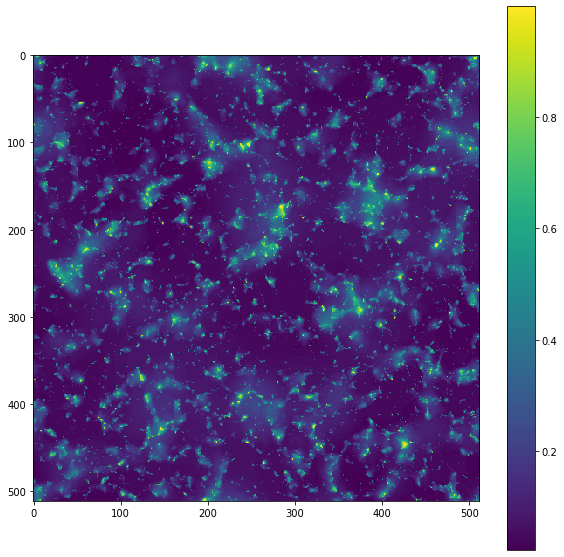

In [157]:
#Normalize data by minmax. There are better scalings for sure
class ScaleField():
    # minmax scaling for now
    def __init__(self, field):
        super(ScaleField, self).__init__()

        self.fmin  = field.min()
        self.fmax  = field.max()
        self.fmean = field.mean()
    
    
    def scale(self, field, inv=False): 
        if not inv:
            self.scaled = True
            return (field - self.fmin) / (self.fmax - self.fmin)
        if inv:
            self.scaled = False
            return field * (self.fmax - self.fmin) + self.fmin
    
density_scalingL = ScaleField(densL)
density_scalingE = ScaleField(densE)
reionization_scaling = ScaleField(reion)

plt.figure(figsize=(10,10))
plt.imshow(densL[0])
plt.colorbar()

densL = density_scalingL.scale(field=densL, inv=False)
densE = density_scalingE.scale(field=densE, inv=False)

plt.figure(figsize=(10,10))
plt.imshow(densL[0])
plt.colorbar()

plt.figure(figsize=(10,10))
plt.imshow(reion[0])
plt.colorbar()

reion = reionization_scaling.scale(field=reion, inv=False)
plt.figure(figsize=(10,10))
plt.imshow(reion[0])
plt.colorbar()


In [158]:
# Super simple 3D CNN
import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

def cubify(arr, newshape):
    '''stolen from https://stackoverflow.com/questions/42297115/numpy-split-cube-into-cubes'''
    oldshape = np.array(arr.shape)
    repeats = (oldshape / newshape).astype(int)
    tmpshape = np.column_stack([repeats, newshape]).ravel()
    order = np.arange(len(tmpshape))
    order = np.concatenate([order[::2], order[1::2]])
    
    # newshape must divide oldshape evenly or else ValueError will be raised
    return arr.reshape(tmpshape).transpose(order).reshape(-1, *newshape)

def uncubify(arr, oldshape):
    '''stolen from https://stackoverflow.com/questions/42297115/numpy-split-cube-into-cubes'''
    N, newshape = arr.shape[0], arr.shape[1:]
    oldshape = np.array(oldshape)    
    repeats = (oldshape / newshape).astype(int)
    tmpshape = np.concatenate([repeats, newshape])
    order = np.arange(len(tmpshape)).reshape(2, -1).ravel(order='F')
    return arr.reshape(tmpshape).transpose(order).reshape(oldshape)



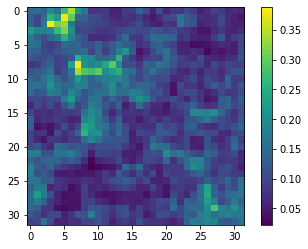

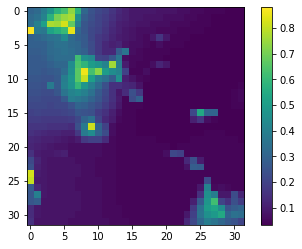

In [159]:

ndim_sm = 32
# d = np.arange(ndim**3).reshape(ndim, ndim, ndim)
dens_s = cubify(densE,  (ndim_sm, ndim_sm, ndim_sm))[..., np.newaxis]
reion_s = cubify(reion, (ndim_sm, ndim_sm, ndim_sm))[..., np.newaxis] 

ndim  = dens_s.shape[1]



plt.imshow(dens_s[0,0, ..., 0])
plt.colorbar()

plt.figure()
plt.imshow(reion_s[0,0, ..., 0])
plt.colorbar()

In [160]:
# nfilter     = 8
# nlevel      = 5

# # kernel_size = (5,5,5)
# kernel_size = (3,3,3)

# stride      = (1,1,1)

# batch_size = 4
# model = tfk.Sequential()

# for i in range(nlevel):
    
#     model.add(tfkl.Conv3D(nfilter, kernel_size=kernel_size, strides=stride, 
#                 padding='same', activation='relu', input_shape=(ndim_sm, ndim_sm, ndim_sm, 1)))
#     model.add(tfkl.BatchNormalization(training=True))

# model.add(tfkl.Conv3D(1, kernel_size=kernel_size, strides=stride, 
#             padding='same', input_shape=(ndim_sm, ndim_sm, ndim_sm, 1)))


# optimizer = tfk.optimizers.Adam(1e-2)

# model.compile(loss='mse',
#              optimizer=optimizer)

# model.summary()

In [161]:
# Super simple resnet, adapted from https://github.com/calmisential/TensorFlow2.0_ResNet/blob/master/models/resnet.py
class BasicBlock(tfkl.Layer):

    def __init__(self, filter_num, strides=1, kernel_size=(5,5,5)):
        super(BasicBlock, self).__init__()
        self.conv1 = tfkl.Conv3D(filters=filter_num,
                                            kernel_size=kernel_size,
                                            strides=strides,
                                            padding="same")
        self.bn1 = tfkl.BatchNormalization()
        self.conv2 = tfkl.Conv3D(filters=filter_num,
                                            kernel_size=kernel_size,
                                            strides=1,
                                            padding="same")
        self.bn2 = tfkl.BatchNormalization()

        self.downsample = tf.keras.Sequential()
        self.downsample.add(tfkl.Conv3D(filters=filter_num,
                                                       kernel_size=(1, 1, 1),
                                                       strides=strides))
        self.downsample.add(tfkl.BatchNormalization())

    def call(self, inputs, training=None, **kwargs):
        residual = self.downsample(inputs)

        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)

        output = tf.nn.relu(tfkl.add([residual, x]))

        return output

def make_basic_block_layer(filter_num, blocks, blocknum=0, strides=1, kernel_size=(5,5,5)):
    res_block = tf.keras.Sequential(name='Res_block_{:02d}'.format(blocknum))
    res_block.add(BasicBlock(filter_num, strides=strides, kernel_size=kernel_size))

    for _ in range(1, blocks):
        res_block.add(BasicBlock(filter_num, strides=1, kernel_size=kernel_size))

    return res_block

class ResNet(tfk.Model):
    def __init__(self, blocks=[1], filters=[8], kernel_size=(5,5,5), strides=1):
        super(ResNet, self).__init__()
        self.blocks      = blocks
        self.filters     = filters
        self.kernel_size = kernel_size
        
        self.conv1 = tfkl.Conv3D(filters=filters[0],
                                            kernel_size=kernel_size,
                                            strides=1,
                                            padding="same", name='initial_conv')
        
        self.bn1 = tfkl.BatchNormalization(name='initial_batch_norm')
        
        self.layers_all = []
        for il in range(len(self.filters)):

            self.layers_all += [make_basic_block_layer(filter_num=filters[il],
                                                       blocks=blocks[il],
                                                       kernel_size=kernel_size,
                                                       strides=strides,
                                                       blocknum=il)]
        print(self.layers_all)
        
    def call(self, inputs, training=None, mask=None):
        
        x = self.conv1(inputs, training=training)
        x = self.bn1(x, training=training)
        
        for il in range(len(self.filters)):
    
            x = self.layers_all[il](x, training=training)

        return x


In [162]:
# V-NET
class ResBlock(tfkl.Layer):
    def __init__(self, filter_num, conv_per_layer=2, strides=1, kernel_size=(5,5,5)):
        super(ResBlock, self).__init__()
        
        self.conv_per_layer = 2      
        self.conv = tfkl.Conv3D(filters=filter_num,
                                            kernel_size=kernel_size,
                                            strides=strides,
                                            padding="same")
        self.bn   = tfkl.BatchNormalization()

    def call(self, inputs, training=None, **kwargs):
        layer_input = inputs
        
        x = self.conv(inputs)
        x = self.bn(x, training=training)
        x = tf.nn.relu(x)

        for ic in range(1, self.conv_per_layer):
            x = self.conv(x)
            x = self.bn(x, training=training)
            x = tf.nn.relu(x)

        x = tfkl.add([layer_input, x])
       
        return x
 

class Downsample(tfkl.Layer):
    def __init__(self, filter_num, strides=1, kernel_size=(5,5,5)):
        super(Downsample, self).__init__()   
        
        self.conv = tfkl.Conv3D(filters=filter_num,
                                            kernel_size=kernel_size,
                                            strides=strides,
                                            padding="same")
        self.bn   = tfkl.BatchNormalization()

    def call(self, inputs, training=None, **kwargs):
        
        output = self.conv(inputs)
        output = self.bn(output, training=training)
        output = tf.nn.relu(output)

        return output

    
class Upsample(tfkl.Layer):
    def __init__(self, filter_num, strides=1, kernel_size=(5,5,5)):
        super(Upsample, self).__init__()   
        
        self.conv = tfkl.Conv3DTranspose(filters=filter_num,
                                            kernel_size=kernel_size,
                                            strides=strides,
                                            padding="same")
        self.bn   = tfkl.BatchNormalization()

    def call(self, inputs, training=None, **kwargs):
        
        output = self.conv(inputs)
        output = self.bn(output, training=training)
        output = tf.nn.relu(output)

        return output    
    
def make_res_block(filter_num, conv_per_layer=2, strides=1, kernel_size=(5,5,5), level=0):
        
    res_block = tfk.Sequential(name='Res_block_{:02d}'.format(level))
    res_block.add(ResBlock(filter_num, conv_per_layer=conv_per_layer, 
                             strides=strides, kernel_size=kernel_size))

    return res_block

def make_downsample(filter_num, strides=1, kernel_size=(5,5,5), level=0):      
    down = tfk.Sequential(name='downsample_{:02d}'.format(level))
    down.add(Downsample(filter_num, strides=strides, kernel_size=kernel_size))

    return down

def make_upsample(filter_num, strides=1, kernel_size=(5,5,5), level=0): 
    up = tfk.Sequential(name='upsample_{:02d}'.format(level))
    up.add(Upsample(filter_num, strides=strides, kernel_size=kernel_size))

    return up

class VNet(tfk.Model):
    def __init__(self, nlayers=1, filters_i=8, conv_per_layer=2, kernel_size=(5,5,5), strides=1):
        super(VNet, self).__init__()
        
        self.nlayers        = nlayers
        self.filters_i      = filters_i
        self.kernel_size    = kernel_size
        self.conv_per_layer = conv_per_layer
        self.strides        = strides
        
        self.conv1 = tfkl.Conv3D(filters        = self.filters_i,
                                    kernel_size = self.kernel_size,
                                    strides     = 1,
                                    padding     = "same", name='initial_conv')
        
#         self.bn1 = tfkl.BatchNormalization(name='initial_batch_norm')
        
        self.conv_final = tfkl.Conv3D(filters   = 1,
                                    kernel_size = (1,1,1),
                                    strides     = 1,
                                    padding     = "same", name='final_conv')
#         self.bn_final = tfkl.BatchNormalization(name='final_batch_norm')

        self.res_layers_down   = []
        self.res_layers_up     = []

        self.downsample_layers = []
        self.upsample_layers   = []

        for il in range(self.nlayers):

            self.res_layers_down        += [make_res_block(filter_num      = self.filters_i * 2**(il),
                                                       conv_per_layer = self.conv_per_layer,
                                                       strides        = self.strides,
                                                       kernel_size    = self.kernel_size,
                                                       level          = il)]
            
            self.res_layers_up          += [make_res_block(filter_num      = self.filters_i * 2**(il+1),
                                                       conv_per_layer = self.conv_per_layer,
                                                       strides        = self.strides,
                                                       kernel_size    = self.kernel_size,
                                                       level          = il)]

            self.downsample_layers += [make_downsample(filter_num     = self.filters_i * 2**(il+1),
                                                       strides        = self.strides * 2,
                                                       kernel_size    = self.kernel_size,
                                                       level          = il)]
            
            self.upsample_layers   += [make_upsample(filter_num         = self.filters_i * 2**(il),
                                                       strides        = self.strides * 2,
                                                       kernel_size    = self.kernel_size,
                                                       level          = il)]

        # bottom layer
        self.res_layers_down += [make_res_block(filter_num      = self.filters_i * 2**(il+1),
                                                   conv_per_layer = self.conv_per_layer,
                                                   strides        = self.strides,
                                                   kernel_size    = self.kernel_size,
                                                   level          = il)]
        
    def call(self, input, training=None, mask=None):
        
        x = self.conv1(input, training=training)
#         x = self.bn1(x, training=training)
        x = tf.nn.relu(x)

        feed_forward = list()

        # downsampling
        for il in range(self.nlayers):
    
            x = self.res_layers_down[il](x, training=training)
            feed_forward.append(x)
            
            x = self.downsample_layers[il](x, training=training)
            
        print(x)
        # bottom layer
        x = self.res_layers_down[-1](x, training=training)

        # upsampling
        for il in reversed(range(self.nlayers)):
            x = self.upsample_layers[il](x, training=training)

            x = tf.concat((x, feed_forward[il]), axis=-1)

            x = self.res_layers_up[il](x, training=training)


        # final conv
        x = self.conv_final(x, training=training)

#         x = self.bn_final(x, training=training)
#         x = tf.nn.sigmoid(x)

        return x


In [163]:
# blocks      = [1] #[1,1]
# filters     = [8] #[8,16]
filters_i      = 16
nlayers        = 4
conv_per_layer = 2

# kernel_size = (5,5,5)
kernel_size = (3,3,3)

model = VNet(nlayers=nlayers, filters_i=filters_i, conv_per_layer=conv_per_layer, kernel_size=kernel_size, strides=1)

model.build(input_shape=(None, ndim_sm, ndim_sm, ndim_sm, 1))

# out = model.predict(dens_s[:1])

optimizer = tfk.optimizers.Adam(1e-3)

model.compile(loss='mse',
             optimizer=optimizer,
             metrics=['accuracy'])

model.summary()
    
# model.downsample_layers[0].summary()

Tensor("downsample_03/downsample_27/Relu:0", shape=(None, 2, 2, 2, 256), dtype=float32)
Model: "v_net_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
initial_conv (Conv3D)        multiple                  448       
_________________________________________________________________
final_conv (Conv3D)          multiple                  33        
_________________________________________________________________
Res_block_00 (Sequential)    multiple                  6992      
_________________________________________________________________
Res_block_01 (Sequential)    multiple                  27808     
_________________________________________________________________
Res_block_02 (Sequential)    multiple                  110912    
_________________________________________________________________
Res_block_03 (Sequential)    multiple                  443008    
_____________________________________

In [ ]:
#reion, dens
epochs = 100

nsamp = dens_s.shape[0]//2

# x_train, x_test = dens_s[:nsamp], dens_s[nsamp:nsamp*2]
# y_train, y_test = reion_s[:nsamp], reion_s[nsamp:nsamp*2]

x_train = dens_s
y_train = reion_s

print(x_train.shape, y_train.shape)
history = model.fit(x_train, y_train,
                   epochs=epochs, validation_split=0.1,
                   verbose=1)

(4096, 32, 32, 32, 1) (4096, 32, 32, 32, 1)
Epoch 1/100
116/116 [==============================] - 23s 202ms/step - loss: 0.0013 - accuracy: 7.7288e-04 - val_loss: 0.0142 - val_accuracy: 6.6990e-06
Epoch 2/100
116/116 [==============================] - 23s 202ms/step - loss: 0.0014 - accuracy: 7.7247e-04 - val_loss: 0.0156 - val_accuracy: 5.2848e-06
Epoch 3/100
116/116 [==============================] - 23s 201ms/step - loss: 0.0015 - accuracy: 7.7080e-04 - val_loss: 0.0148 - val_accuracy: 6.6245e-06
Epoch 4/100
116/116 [==============================] - 23s 202ms/step - loss: 0.0013 - accuracy: 7.7329e-04 - val_loss: 0.0141 - val_accuracy: 1.0123e-05
Epoch 5/100
116/116 [==============================] - 23s 202ms/step - loss: 0.0013 - accuracy: 7.7356e-04 - val_loss: 0.0134 - val_accuracy: 9.6019e-06
Epoch 6/100
116/116 [==============================] - 23s 202ms/step - loss: 0.0013 - accuracy: 7.7392e-04 - val_loss: 0.0153 - val_accuracy: 8.6342e-06
Epoch 7/100
116/116 [===========

In [173]:
# model.save('test_model')

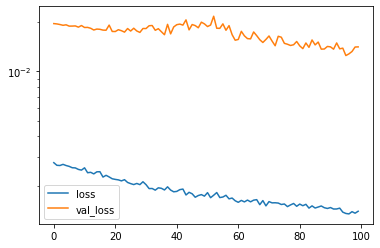

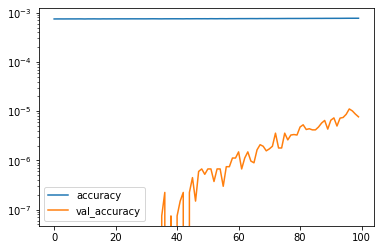

In [174]:
plotkeys = ['loss', 'accuracy']
for pkey in plotkeys:
    plt.figure()
    for i, key in enumerate(history.history.keys()):
        if pkey in key:
            plt.semilogy(history.history[key], label=key)
    plt.legend()


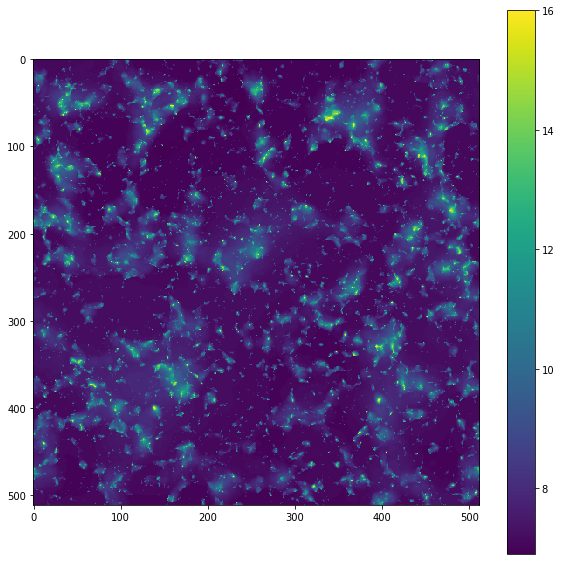

In [175]:
# get test data

datadir = '../data_clean/'

freion = open(datadir+'reionization/reion_01')
fdens  = open(datadir+'density_Eul/dens_01')

x_test  = np.fromfile(fdens, count=N**3, dtype=np.float32).reshape(N,N,N)
y_test  = np.fromfile(freion, count=N**3, dtype=np.float32).reshape(N,N,N)

density_scaling_test      = ScaleField(x_test)
reionization_scaling_test = ScaleField(y_test)

x_test = density_scaling_test.scale(field=x_test, inv=False)

plt.figure(figsize=(10,10))
plt.imshow(y_test[0])
plt.colorbar()

x_test = cubify(x_test,  (ndim_sm, ndim_sm, ndim_sm))[..., np.newaxis]
y_test = cubify(y_test,  (ndim_sm, ndim_sm, ndim_sm))[..., np.newaxis]


In [176]:
density_scalingE.fmin, density_scaling_test.fmin, reionization_scaling.fmin, reionization_scaling_test.fmin

(-0.99999994, -1.0, 6.8, 6.9)

In [177]:
model.trainable=False
# y_test_pred = model.predict(x_train)
# y_test_pred = reionization_scaling.scale(field=y_test_pred, inv=True)
y_train_pred = model.predict(x_train)
y_train_pred = reionization_scaling.scale(field=y_train_pred, inv=True)

y_test_pred = model.predict(x_test)
y_test_pred = reionization_scaling_test.scale(field=y_test_pred, inv=True)

[[ 7.2  7.2  7.2 ...  7.1  7.1  7.1]
 [ 7.2  7.2  7.2 ...  7.1  7.1  7.1]
 [ 7.2  7.2  7.2 ...  7.1  7.1  7.1]
 ...
 [13.7 13.   7.9 ...  8.3  7.2  7.2]
 [11.2 12.5  8.3 ...  8.   7.2  7.2]
 [12.9  9.7  8.6 ...  7.2  7.2  7.2]] [[7.0464907 6.980204  7.043827  ... 7.0180845 7.0411654 7.2257013]
 [6.99357   7.048849  7.1307573 ... 7.1381936 7.190748  7.2785907]
 [7.058198  7.136491  7.123889  ... 7.235567  7.2925997 7.390968 ]
 ...
 [7.6214    7.832839  7.5835996 ... 7.737772  7.617236  7.557542 ]
 [7.7966275 7.8827033 7.482807  ... 7.6428437 7.510936  7.540366 ]
 [7.5194635 7.476384  7.3434114 ... 7.3988066 7.322753  7.4630647]]


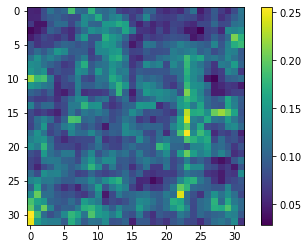

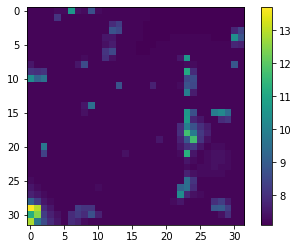

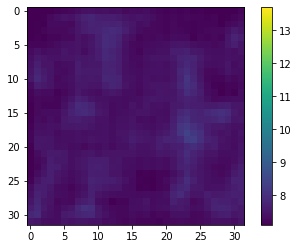

In [178]:
xshow = x_train[0,ndim_sm//2, ..., 0]
yshow = reionization_scaling.scale(field=y_train[0,ndim_sm//2, ..., 0], inv=True)
yshow_pred = y_train_pred[0,ndim_sm//2, ..., 0]

print(yshow, yshow_pred)

ymin = yshow.min()
ymax = yshow.max()

plt.figure()
plt.imshow(xshow)
plt.colorbar()

plt.figure()
plt.imshow(yshow, vmin=ymin, vmax=ymax)
plt.colorbar()

plt.figure()
plt.imshow(yshow_pred, vmin=ymin, vmax=ymax)
plt.colorbar()

[[ 7.3  7.2  7.2 ...  7.1  7.1  7.1]
 [ 7.3  7.2  7.2 ...  7.1  7.1  7.1]
 [ 7.3  7.2  7.2 ...  7.1  7.1  7.1]
 ...
 [ 9.7  8.6  7.9 ...  8.1  8.1  8.1]
 [11.5 10.3  7.8 ...  8.2  8.2  8.2]
 [10.4 13.1 13.4 ...  8.2  8.3  8.3]] [[7.0985336 7.066992  7.0801706 ... 7.2751045 7.260806  7.3901815]
 [7.1337247 7.262015  7.223369  ... 7.4859753 7.447724  7.4789505]
 [7.178492  7.395827  7.3791466 ... 7.417821  7.4128466 7.4878974]
 ...
 [7.9976463 7.9692965 7.599746  ... 7.909238  7.9912457 7.8740096]
 [8.220883  8.411115  7.6621723 ... 7.9118586 7.96546   7.871479 ]
 [7.606941  8.115363  7.771081  ... 7.6531544 7.7345867 7.741224 ]]


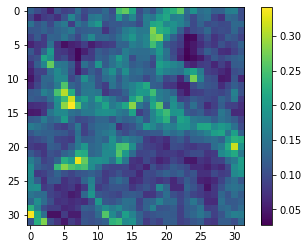

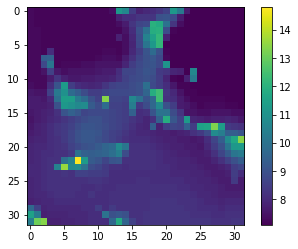

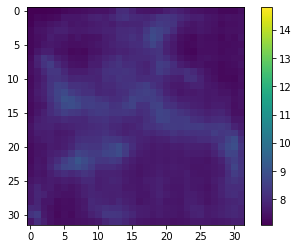

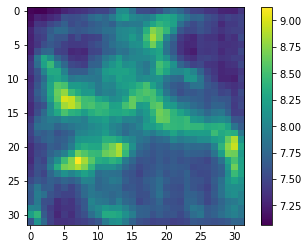

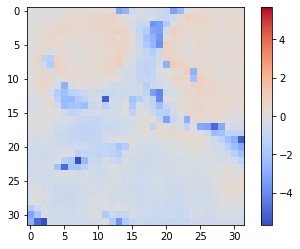

In [179]:
from matplotlib import cm

xshow = x_test[0,ndim_sm//2, ..., 0]
yshow = y_test[0,ndim_sm//2, ..., 0]
yshow_pred = y_test_pred[0,ndim_sm//2, ..., 0]

print(yshow, yshow_pred)

ymin = yshow.min()
ymax = yshow.max()

plt.figure()
plt.imshow(xshow)
plt.colorbar()

plt.figure()
plt.imshow(yshow, vmin=ymin, vmax=ymax)
plt.colorbar()

plt.figure()
plt.imshow(yshow_pred, vmin=ymin, vmax=ymax)
plt.colorbar()

plt.figure()
plt.imshow(yshow_pred)
plt.colorbar()

diff = yshow_pred-yshow
plt.figure()
plt.imshow(diff, vmin=-np.abs(diff).max(), vmax=np.abs(diff).max(), cmap=plt.get_cmap('coolwarm'))
plt.colorbar()